### BitPredict

Time series problems deal with data over time.

Ex: No of staff over 10-years, sales of computers for the past 5-years

The timeline can be short (s/min) or long (years/decades)

<img src='https://camo.githubusercontent.com/cf5d133477c6ac29e568767d497f5d691cec66673e4c4f9aad013e50eb8e4080/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d6578616d706c652d74696d652d7365726965732d70726f626c656d732e706e67' />

For the forecasting of Bitcoin, the historical data for the past month can be the data and the label could be today's price (cannot be tomorrow's price since that was we'd want to predict).

### import data

In [5]:
import requests
import pandas as pd
url = "http://api.scraperlink.com/investpy/?email=your@email.com&type=historical_data&product=cryptos&symbol=BTC&from_date=10/01/2013&to_date=10/04/2022"

response = requests.request("GET", url)

prices = response.json()['data']
prices

[{'direction_color': 'greenFont',
  'rowDate': 'Oct 04, 2022',
  'rowDateRaw': 1664841600,
  'rowDateTimestamp': '2022-10-04T00:00:00Z',
  'last_close': '20,340.2',
  'last_open': '19,629.7',
  'last_max': '20,436.1',
  'last_min': '19,506.4',
  'volume': '368.17K',
  'volumeRaw': 368172,
  'change_precent': '3.63',
  'last_closeRaw': '20340.17773437500000',
  'last_openRaw': '19629.71875000000000',
  'last_maxRaw': '20436.06250000000000',
  'last_minRaw': '19506.42578125000000',
  'change_precentRaw': 3.626891602518687},
 {'direction_color': 'greenFont',
  'rowDate': 'Oct 03, 2022',
  'rowDateRaw': 1664755200,
  'rowDateTimestamp': '2022-10-03T00:00:00Z',
  'last_close': '19,628.3',
  'last_open': '19,057.6',
  'last_max': '19,676.0',
  'last_min': '19,001.3',
  'volume': '333.03K',
  'volumeRaw': 333028,
  'change_precent': '3.02',
  'last_closeRaw': '19628.28125000000000',
  'last_openRaw': '19057.63476562500000',
  'last_maxRaw': '19676.03515625000000',
  'last_minRaw': '19001.2734

In [6]:
data = pd.DataFrame(prices)
data.head()

,direction_color,rowDate,rowDateRaw,rowDateTimestamp,last_close,last_open,last_max,last_min,volume,volumeRaw,change_precent,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw,change_precentRaw
0,greenFont,"Oct 04, 2022",1664841600,2022-10-04T00:00:00Z,"20,340.2","19,629.7","20,436.1","19,506.4",368.17K,368172,3.63,20340.17773437500000,19629.71875000000000,20436.06250000000000,19506.42578125000000,3.626892
1,greenFont,"Oct 03, 2022",1664755200,2022-10-03T00:00:00Z,"19,628.3","19,057.6","19,676.0","19,001.3",333.03K,333028,3.02,19628.28125000000000,19057.63476562500000,19676.03515625000000,19001.27343750000000,3.023788
2,redFont,"Oct 02, 2022",1664668800,2022-10-02T00:00:00Z,"19,052.2","19,311.9","19,389.9","18,937.3",222.82K,222824,-1.34,19052.18359375000000,19311.94921875000000,19389.89062500000000,18937.32617187500000,-1.344844
3,redFont,"Oct 01, 2022",1664582400,2022-10-01T00:00:00Z,"19,311.9","19,422.9","19,480.3","19,172.6",173.91K,173906,-0.57,19311.89843750000000,19422.89843750000000,19480.29882812500000,19172.61523437500000,-0.572030
4,redFont,"Sep 30, 2022",1664496000,2022-09-30T00:00:00Z,"19,423.0","19,593.4","20,174.9","19,208.9",490.29K,490290,-0.87,19423.00390625000000,19593.38476562500000,20174.87890625000000,19208.85351562500000,-0.867390


Column definitions:
* `last_close`: closing price of the time interval (last price btc trades at before market closes)
* `last_open`: Opening price of the time interval (first price btc trades at when market opens)
* `last_max`: Highest price btc was traded for during time interval
* `last_min`: Lowest price btc was traded for during time interval

In [7]:
# Remove unnecessary columns
data.drop(columns=[
  'direction_color',
  'rowDateRaw',
  'rowDateTimestamp',

  # Quantity of btc bought or sold
  'volume',
  'volumeRaw',
  'change_precent',
  'change_precentRaw',
  'last_close',
  'last_open',
  'last_max',
  'last_min'
  ],
  inplace=True
)

data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,"Oct 04, 2022",20340.17773437500000,19629.71875000000000,20436.06250000000000,19506.42578125000000
1,"Oct 03, 2022",19628.28125000000000,19057.63476562500000,19676.03515625000000,19001.27343750000000
2,"Oct 02, 2022",19052.18359375000000,19311.94921875000000,19389.89062500000000,18937.32617187500000
3,"Oct 01, 2022",19311.89843750000000,19422.89843750000000,19480.29882812500000,19172.61523437500000
4,"Sep 30, 2022",19423.00390625000000,19593.38476562500000,20174.87890625000000,19208.85351562500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rowDate        3291 non-null   object
 1   last_closeRaw  3291 non-null   object
 2   last_openRaw   3291 non-null   object
 3   last_maxRaw    3291 non-null   object
 4   last_minRaw    3291 non-null   object
dtypes: object(5)
memory usage: 128.7+ KB


In [9]:
# Convert date object to datetime
data['rowDate'] = pd.to_datetime(data['rowDate'])

# Convert values to floats
data = data.astype({ 'last_closeRaw': 'float', 'last_openRaw': 'float', 'last_maxRaw': 'float', 'last_minRaw': 'float' })

In [10]:
data.set_index('rowDate', inplace=True)

In [11]:
data.head()

,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
rowDate,,,,
2022-10-04,20340.177734,19629.718750,20436.062500,19506.425781
2022-10-03,19628.281250,19057.634766,19676.035156,19001.273438
2022-10-02,19052.183594,19311.949219,19389.890625,18937.326172
2022-10-01,19311.898438,19422.898438,19480.298828,19172.615234
2022-09-30,19423.003906,19593.384766,20174.878906,19208.853516


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2022-10-04 to 2013-10-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   last_closeRaw  3291 non-null   float64
 1   last_openRaw   3291 non-null   float64
 2   last_maxRaw    3291 non-null   float64
 3   last_minRaw    3291 non-null   float64
dtypes: float64(4)
memory usage: 128.6 KB


In [13]:
len(data)

3291

In time series problems, usually the no. of samples is much less (eventhough the data for 9 years is present its only 3291 rows), which can be an issue since DL algorithms fluorish with lots of data (1000s or even millions)

**Note**: The frequency at which a time series value is collected is often referred to as **seasonality** (no. of samples per year), which is usually measured in no. of samples per year.
* Collecting data once per year would result in a time series with a seasonality of 365.

**Side-note**: time series data collected with different seasonality values often exhibit seasonal patterns
* Ex: electricity demand is higher in summer than winter (AC)

<img src='https://camo.githubusercontent.com/0e163454f6671cdbcd43dd1dabbd191c9e7256e8bbf82ef3076c2169d91eecec/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d74797065732d6f662d74696d652d7365726965732d7061747465726e732e706e67' />

In time series problems there're two types of data:
* Univariate - data deals with one variable (Ex: using price of bitcoin to predict price of bitcoin). Using the target to predict the target.
* Multivariate - data deals with more than one variable (Ex: using price of bitcoin & block rewards size to predict price of bitcoin). Using the target and another time series to predict the target

<img src='https://camo.githubusercontent.com/aa05b7ec4479d147154185a9208da36c24d7379f412f27307af64338a1ffda50/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d756e69766172696174652d616e642d6d756c7469766172696174652d74696d652d7365726965732d646174612e706e67' />

### Data Exploration

In [14]:
bitcoin_prices = pd.DataFrame(data['last_closeRaw']).rename(columns={ 'last_closeRaw': 'Price' })
bitcoin_prices.head()

,Price
rowDate,
2022-10-04,20340.177734
2022-10-03,19628.281250
2022-10-02,19052.183594
2022-10-01,19311.898438
2022-09-30,19423.003906


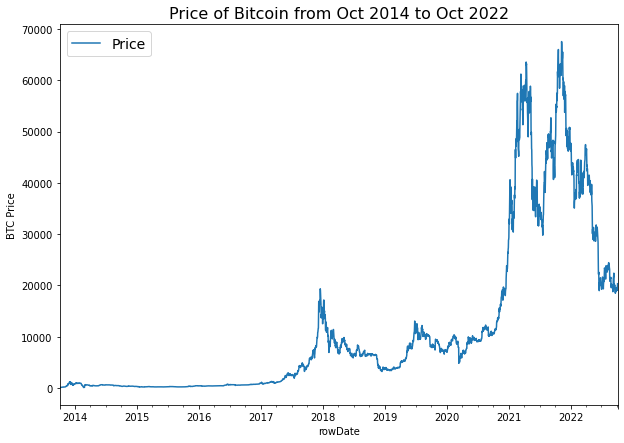

In [15]:
# Visualize closing prices
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from Oct 2014 to Oct 2022', fontsize=16)
plt.legend(fontsize=14);

### Create train & test sets

*Phase 01 - the wrong way*

In [16]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2022-10-04T00:00:00.000000000', '2022-10-03T00:00:00.000000000',
        '2022-10-02T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
        '2022-09-30T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
        '2022-09-28T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
        '2022-09-26T00:00:00.000000000', '2022-09-25T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([20340.17773438, 19628.28125   , 19052.18359375, 19311.8984375 ,
        19423.00390625, 19592.95117188, 19410.95507812, 19080.99609375,
        19225.6796875 , 18803.17382812]))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timesteps,
    prices,
    test_size=.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2632,), (659,), (2632,), (659,))

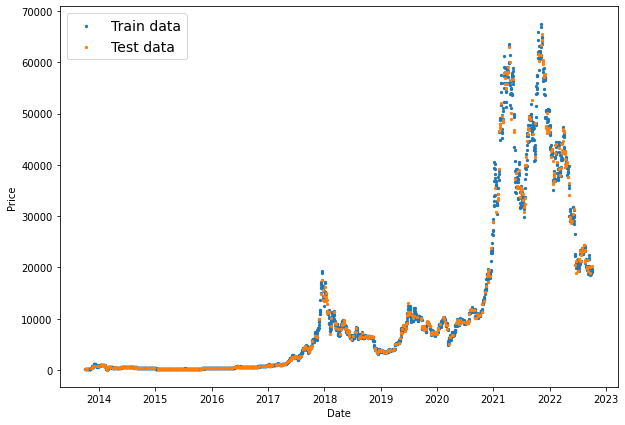

In [18]:
# Plot incorrect data splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(fontsize=14)
plt.show();

This will not work out, since the test and training data are mixed up (data leakage)

The `train_test_split` randomly splits the data, which is fine for a NLP/classification or other regression problems, however things change when a time component is involved

Since forecasting has a time component that must be given most priority. In this case we want to predict the future values of btc prices using the past prices

IOW, for training data the prices up to a specific point must be used and for the test data the prices ahead of the specified point must be used.
* Ex: for training prices from 2013-2020 can be used, for test the prices from 2020-2022 must be used

*Phase 02 - the right way*

<img src='https://camo.githubusercontent.com/4905dce383c2fabee4fb25f6308f93b208c3b2f97011391768e16cabbd9e419b/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d74696d652d7365726965732d747261696e2d746573742d73706c69742e706e67' />

A specific point in time can be used as the split point (aka a pseudofuture), everything before that can be taken for training and everything after that for testing

In [19]:
# Create sequential splits at a specified point (80% train, 20% test)
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2632,), (659,), (2632,), (659,))

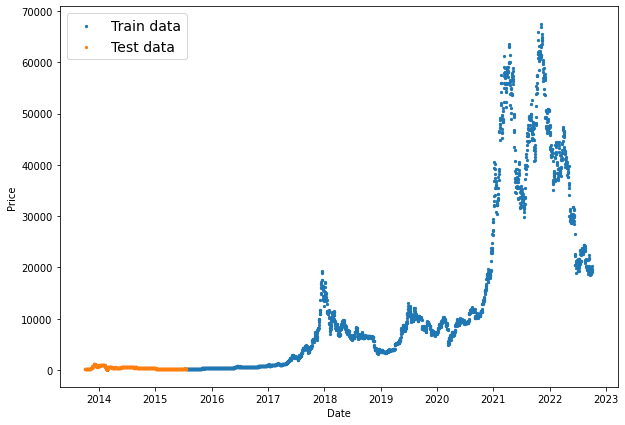

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=14)
plt.show();

This is happening since the data is ordered in descending order - try again after ordering it ascendingly

In [21]:
bitcoin_prices.sort_values('rowDate', inplace=True)
bitcoin_prices.head()

,Price
rowDate,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,130.990005
2013-10-04,136.820007
2013-10-05,136.699997


In [22]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([140.30000305, 123.        , 130.99000549, 136.82000732,
        136.69999695, 137.80000305, 135.80000305, 136.49000549,
        139.5       , 140.41000366]))

In [23]:
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2632,), (659,), (2632,), (659,))

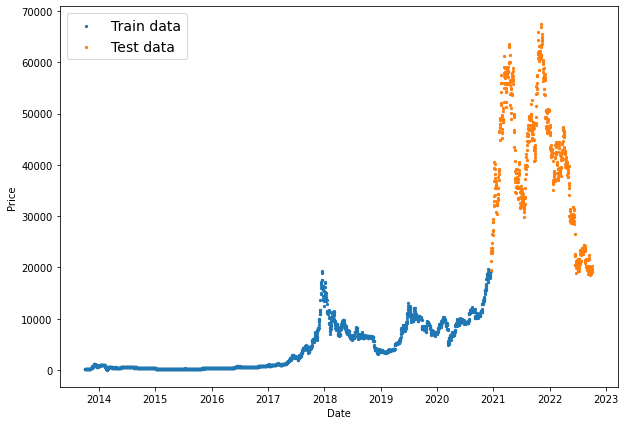

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=14)
plt.show();

Since the test data is a pseudofuture, and the actual data is available, this can be used as a guide to check if the predictions are accurate or not

In [25]:
# Create a helper plotting function
def plot_time_series(timesteps, prices, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], prices[start:end], format, label=label)
    plt.xlabel('Time')
    plt.ylabel('Price')
    if label:
        plt.legend(fontsize=14)
    # Display a grid for easier measurement readings
    plt.grid(True)

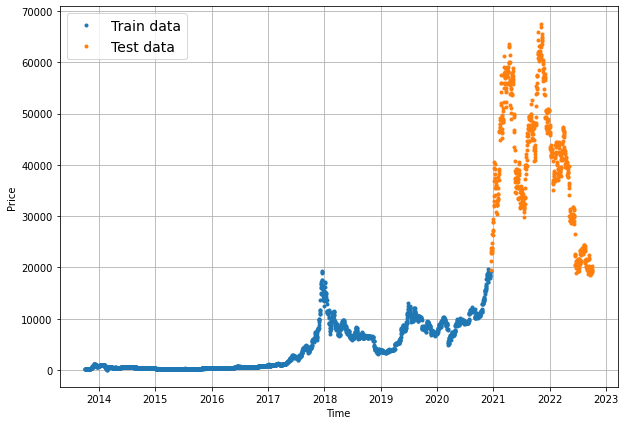

In [26]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, prices=y_train, label='Train data')
plot_time_series(timesteps=X_test, prices=y_test, label='Test data')

### Modelling experiments

Almost any kind of model can be built as long as the inputs & outputs are formatted correctly. However, this does not mean that they will perform well

Two key terms to remember about forecasting:
* **Horizon** - the number of timesteps to be predicted
* **Window** - the number of timesteps used to predict the horizon

Ex: For predicting the price of btc tomorrow using last weeks data - horizon of 1 and window of 7

**Naive forecast**

One of the most common baseline models. All this does is use the previous timesteps value to predict the next timesteps value.

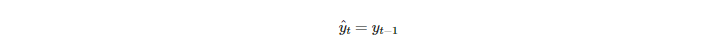

> The prediction at timestep `t` is equal to the value at timestep `t-1`

**Side-note**: In an open system (stock/crypto market - where inputs & outputs freely flow) it usually is hard to perform better than the naive forecast than in a closed system (pocker game winner prizes - where the inputs & outputs are contained within the system)

*Forecasting in an open system is usually poor*

In [27]:
# Naive forecast - every value except the last value (will be predicting this)
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([19434.85546875, 21352.16210938, 22825.375     , 23127.92382812,
        23843.95507812, 23474.87890625, 22728.51757812, 23823.15039062,
        23257.91210938, 23736.48242188]),
 array([18925.19921875, 18803.17382812, 19225.6796875 , 19080.99609375,
        19410.95507812, 19592.95117188, 19423.00390625, 19311.8984375 ,
        19052.18359375, 19628.28125   ]))

ValueError: x and y must have same first dimension, but have shapes (659,) and (658,)

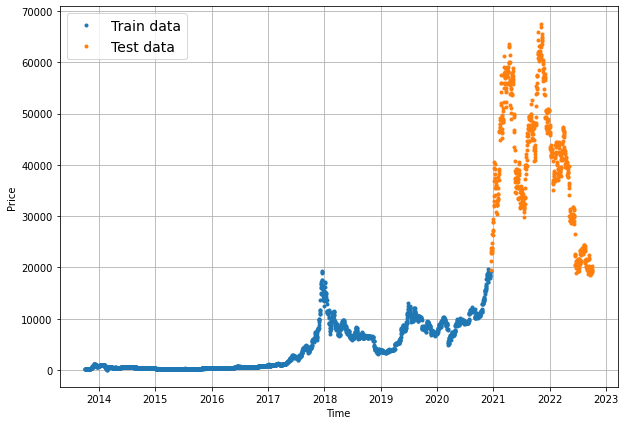

In [28]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, prices=y_train, label='Train data')
plot_time_series(timesteps=X_test, prices=y_test, label='Test data')
plot_time_series(timesteps=X_test, prices=naive_forecast, label='Naive forecast')

In [29]:
X_test.shape, naive_forecast.shape

((659,), (658,))

In [30]:
naive_forecast[-10:], y_test[-10:]

(array([18925.19921875, 18803.17382812, 19225.6796875 , 19080.99609375,
        19410.95507812, 19592.95117188, 19423.00390625, 19311.8984375 ,
        19052.18359375, 19628.28125   ]),
 array([18803.17382812, 19225.6796875 , 19080.99609375, 19410.95507812,
        19592.95117188, 19423.00390625, 19311.8984375 , 19052.18359375,
        19628.28125   , 20340.17773438]))

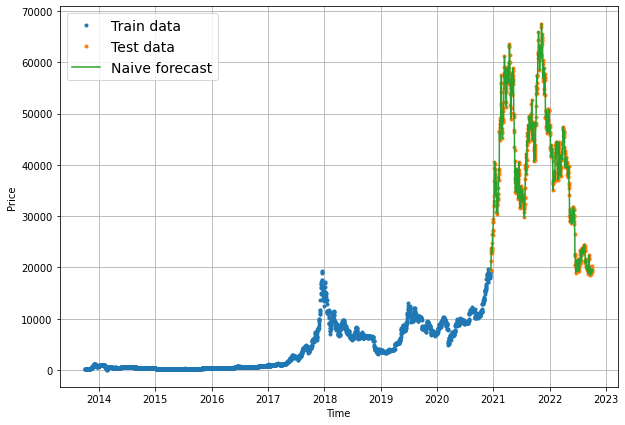

In [31]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, prices=y_train, label='Train data')
plot_time_series(timesteps=X_test, prices=y_test, label='Test data')
plot_time_series(timesteps=X_test[1:], prices=naive_forecast, format='-', label='Naive forecast')

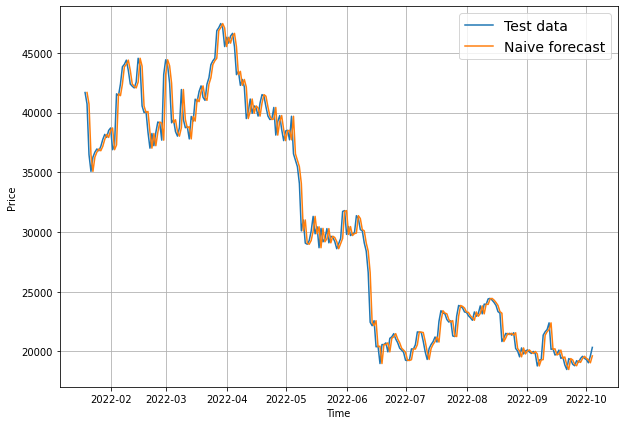

In [32]:
plt.figure(figsize=(10, 7))
offset=400
plot_time_series(timesteps=X_test, prices=y_test, start=offset,format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], prices=naive_forecast, start=offset, format='-', label='Naive forecast')

The naive forecast lags ahead of the ground truths the same throughout, since it uses the previous timestep value to predict the next

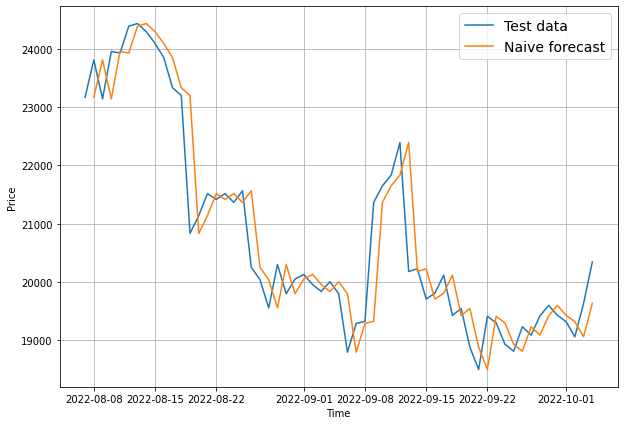

In [33]:
plt.figure(figsize=(10, 7))
offset=600
plot_time_series(timesteps=X_test, prices=y_test, start=offset,format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], prices=naive_forecast, start=offset, format='-', label='Naive forecast')

### Evaluating a model

Since this forecast depends on predicting a number, its a regression kinda problem. Therefore, the metrics used for regression can be used for evaluation

> How does the predictions compare against the ground truths

**Scale-dependent errors**
* Used to compare time series values and forecasts that are on the same scale (Ex: btc historical prices vs btc forecast prices)
  * MAE - easy to interpret, simply is just the difference in values.
  * MSE - squared differences, used when the larger errors are more significant that smaller errors
  * RMSE - also easy to interpret and is the square root of MSE.
  
**Percentage errors**
* Do not have units, therefore is used as to compare forecasts across other other datasets
  * MAPE - most common percentage error. Might explode (not work) if `y=0`
  * sMAPE - is not recommended, although used in many competitions

**Scaled errors**
* An alternative to percentage errors when comparing forecast performance across other datasets
  * MASE - equals to one for naive forecast. Therefore, a better forecast would be a model that gets an MASE < 1
  
*Good to start with MAE, since its the most simplest*

In [34]:
import tensorflow as tf

In [35]:
# Create MASE function (Not in tf API)
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    # btc price forecasting in non-seasonal - shift by 1 cuz seasonality is 1 day
    # (collect data each day)
    mae_naive_no_reason = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae / mae_naive_no_reason

In [36]:
# MASE for naive forecast is almost 1
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

1.0010289163281425

In [37]:
# Create a helper function with all eval metrics
def evaluate_preds(y_true, y_pred):
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': f'{mape.numpy()}%',
        'mase': mase.numpy(),
    }

In [38]:
evaluate_preds(y_test[1:], naive_forecast)

{'mae': 1144.453519780585,
 'mse': 2611117.2588876244,
 'rmse': 1615.8951880885172,
 'mape': '2.8748727508170346%',
 'mase': 1.0010289163281425}

Seems like on average each forecast differs by about $1144 from the actual price

In [39]:
tf.reduce_mean(y_test).numpy(), tf.reduce_min(y_test).numpy(), tf.reduce_max(y_test).numpy()

(40100.593901152315, 18488.98828125, 67527.8515625)

On average the price is 40,100, and each forecast is off by about 1144

### Other baseline models

Some of the below models might even perform much better...
* Moving Average
* ARIMA
* TensorFlow Decision Forests (RF, Gradient Boosting Trees)
* Facebook Kats
* LinkedIn Greykite

### Format data: Windowing dataset

Windowing is a method to turn a time series dataset into a supervised learning problem. IOW use the windows of the past to predict the future

It is important to carry out chronological testing since ordering matters. Therefore, random pieces of data cannot be used as test and train sets

Two methods of of testing forecasting models

<img src='http://eng.uber.com/wp-content/uploads/2018/09/image6-e1536165830511.png' />

In Sliding Window:
* fixed size window
Expanding Window:
 * Uses more and more training data while keeping test window fixed
 * More useful if there is less data
 
Its often also the best to combine both: start with expanding window, and switch to sliding window once the window gets too large

Ex: for univariate time series, windowing for one week (`window=7`) to predict the next value (`horizon=1`) will look like:

```javascript
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

for the case of the price of bitcoin:
```javascript
[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```

<img src='https://camo.githubusercontent.com/c6c284ca3066e7f927f106143212ea5cd80184a7a7d1f4f21fcef482b761eb0d/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d74696d652d7365726965732d77696e646f77732d616e642d686f72697a6f6e732e706e67' />

Can we predict the price of bitcoin tomorrow given the past week of prices?

In [40]:
# predict 1 step at a time
HORIZON = 1

# use a week worth of timesteps to predict the horizon
WINDOW_SIZE = 7

In [42]:
print(f'Use {prices[:7]} to predict {prices[7]}')

Use [140.30000305 123.         130.99000549 136.82000732 136.69999695
 137.80000305 135.80000305] to predict 136.49000549316406


In [58]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [63]:
tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]])>

In [60]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0), horizon=HORIZON)
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]])>)

In [69]:
len(prices)

3291

In [72]:
# Create a function to make windows across entire time series
def make_windows(x, window_size=7, horizon=1):
    # Create a window of specific window_size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    print(f'Window step: {window_step}')
    
    # Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    print(f'Window indexes: {window_indexes}')
    
    windowed_array = x[window_indexes]
    print(f'Window array: {windowed_array}')
    
    windows, labels = get_labelled_windows(windowed_array, horizon)
    return windows, labels

In [73]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

Window step: [[0 1 2 3 4 5 6 7]]
Window indexes: [[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [3281 3282 3283 ... 3286 3287 3288]
 [3282 3283 3284 ... 3287 3288 3289]
 [3283 3284 3285 ... 3288 3289 3290]]
Window array: [[  140.30000305   123.           130.99000549 ...   137.80000305
    135.80000305   136.49000549]
 [  123.           130.99000549   136.82000732 ...   135.80000305
    136.49000549   139.5       ]
 [  130.99000549   136.82000732   136.69999695 ...   136.49000549
    139.5          140.41000366]
 ...
 [18803.17382812 19225.6796875  19080.99609375 ... 19423.00390625
  19311.8984375  19052.18359375]
 [19225.6796875  19080.99609375 19410.95507812 ... 19311.8984375
  19052.18359375 19628.28125   ]
 [19080.99609375 19410.95507812 19592.95117188 ... 19052.18359375
  19628.28125    20340.17773438]]


In [76]:
full_windows.shape, full_labels.shape

((3284, 7), (3284, 1))

In [77]:
for i in range(5):
    print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [140.30000305 123.         130.99000549 136.82000732 136.69999695
 137.80000305 135.80000305] -> Label: [136.49000549]
Window: [123.         130.99000549 136.82000732 136.69999695 137.80000305
 135.80000305 136.49000549] -> Label: [139.5]
Window: [130.99000549 136.82000732 136.69999695 137.80000305 135.80000305
 136.49000549 139.5       ] -> Label: [140.41000366]
Window: [136.82000732 136.69999695 137.80000305 135.80000305 136.49000549
 139.5        140.41000366] -> Label: [140.1000061]
Window: [136.69999695 137.80000305 135.80000305 136.49000549 139.5
 140.41000366 140.1000061 ] -> Label: [142.88999939]


### Turn windows into train & test sets

It was possible to window the existing training & test splits, however, with the nature of windowing (often requires an offset at some point in the data), it usually works better to window the data first before splitting

In [80]:
def make_train_test_splits(windows, labels, test_split=.2):
    split_size = int(len(windows) * (1 - test_split)) # 80%
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [81]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2627, 657, 2627, 657)

In [85]:
# Check to see if original y_train and new labels are same
y_train[WINDOW_SIZE:]

array([  136.49000549,   139.5       ,   140.41000366, ...,
       18808.91992188, 19176.78710938, 19273.83789062])

In [86]:
np.squeeze(train_labels[:-HORIZON - 1])

array([  136.49000549,   139.5       ,   140.41000366, ...,
       18808.91992188, 19176.78710938, 19273.83789062])

In [87]:
np.array_equal(np.squeeze(train_labels[:-HORIZON - 1]), y_train[WINDOW_SIZE:])

True

### Make checkpoint callbacks

In order for a fair comparison between the implemented models, their best performance must be compared.

Since the model's performance will fluctuate from experiment to experiment, the performance in epoch 100 might be lower than its performance in epoch 50.

Therefore, to save the best performing point of each model a checkpoint can be added that would monitor a specified metric and do so.

**Side-note**: Since the dataset is quite small, the experiment results will fluctuate quite a bit while training - making the need for checkpointing more important

In [88]:
import os

# Create a function to implement a model checkpoint with a specific filename
def create_model_checkpoint(model_name, save_path='model_checkpoints'):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

In [90]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

# create reduce lr on plateau callback
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau()

### Model 01 - Dense model (Window = 7, horizon = 1)

* Single dense layer with 128 hidden units
* Output layer
* Adam optimizer, MAE loss function
* Batch size 128, epochs 100

**Side-note**
* Hyperparameters - params that could be tuned (batch size, epochs, hidden units, horizon size, window size)
* Parameters - params that the model learns/patterns (weights, biases)

In [96]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Predicting a number - so there's no need of an activation
    # No need to create probabilities/0-1/only positives
    tf.keras.layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

model_1.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

history_1 = model_1.fit(
    train_windows,
    train_labels,
    validation_data=(test_windows, test_labels),
    epochs=100,
    batch_size=128,
    callbacks=[
#         early_stopping,
#         reduce_lr_plateau,
        create_model_checkpoint(model_1.name)
    ]
)

Epoch 1/100
21/21 [==============================] - 3s 148ms/step - loss: 1237.5881 - mae: 1237.5881 - mse: 5281300.0000 - val_loss: 4422.0908 - val_mae: 4422.0908 - val_mse: 29088844.0000
Epoch 2/100
21/21 [==============================] - 1s 55ms/step - loss: 337.8427 - mae: 337.8427 - mse: 409800.5000 - val_loss: 2512.7258 - val_mae: 2512.7258 - val_mse: 10963448.0000
Epoch 3/100
21/21 [==============================] - 1s 51ms/step - loss: 245.9140 - mae: 245.9140 - mse: 253138.8750 - val_loss: 2124.5815 - val_mae: 2124.5815 - val_mse: 8125024.0000
Epoch 4/100
21/21 [==============================] - 1s 51ms/step - loss: 226.1949 - mae: 226.1949 - mse: 220328.7031 - val_loss: 2109.2427 - val_mae: 2109.2427 - val_mse: 8002888.0000
Epoch 5/100
21/21 [==============================] - 1s 53ms/step - loss: 209.0859 - mae: 209.0859 - mse: 192887.6094 - val_loss: 1845.4597 - val_mae: 1845.4597 - val_mse: 6108729.0000
Epoch 6/100
21/21 [==============================] - 1s 56ms/step - l

21/21 [==============================] - 0s 3ms/step - loss: 136.1694 - mae: 136.1694 - mse: 84845.1953 - val_loss: 1193.4762 - val_mae: 1193.4762 - val_mse: 2741947.5000
Epoch 31/100
21/21 [==============================] - 0s 3ms/step - loss: 125.1474 - mae: 125.1474 - mse: 78988.4688 - val_loss: 1179.8226 - val_mae: 1179.8226 - val_mse: 2710862.5000
Epoch 32/100
21/21 [==============================] - 0s 3ms/step - loss: 130.5312 - mae: 130.5312 - mse: 82972.8438 - val_loss: 1282.5276 - val_mae: 1282.5276 - val_mse: 3020525.7500
Epoch 33/100
21/21 [==============================] - 0s 3ms/step - loss: 128.6988 - mae: 128.6988 - mse: 80064.2891 - val_loss: 1201.7505 - val_mae: 1201.7505 - val_mse: 2812572.2500
Epoch 34/100
21/21 [==============================] - 0s 3ms/step - loss: 129.5616 - mae: 129.5616 - mse: 81454.9922 - val_loss: 1279.3457 - val_mae: 1279.3457 - val_mse: 3072325.2500
Epoch 35/100
21/21 [==============================] - 0s 4ms/step - loss: 135.1425 - mae: 135

Epoch 68/100
21/21 [==============================] - 0s 3ms/step - loss: 128.8539 - mae: 128.8539 - mse: 78734.9609 - val_loss: 1276.7529 - val_mae: 1276.7529 - val_mse: 3060789.7500
Epoch 69/100
21/21 [==============================] - 0s 3ms/step - loss: 124.2611 - mae: 124.2611 - mse: 76288.3281 - val_loss: 1171.1995 - val_mae: 1171.1995 - val_mse: 2713203.2500
Epoch 70/100
21/21 [==============================] - 1s 54ms/step - loss: 127.4245 - mae: 127.4245 - mse: 79041.7109 - val_loss: 1147.6472 - val_mae: 1147.6472 - val_mse: 2635306.0000
Epoch 71/100
21/21 [==============================] - 0s 3ms/step - loss: 129.5468 - mae: 129.5468 - mse: 79683.9453 - val_loss: 1532.1670 - val_mae: 1532.1670 - val_mse: 4053592.0000
Epoch 72/100
21/21 [==============================] - 0s 3ms/step - loss: 147.7409 - mae: 147.7409 - mse: 90099.7734 - val_loss: 1513.4128 - val_mae: 1513.4128 - val_mse: 3975560.5000
Epoch 73/100
21/21 [==============================] - 0s 3ms/step - loss: 147.0

In [97]:
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1199.2662 - mae: 1199.2662 - mse: 2795707.5000


[1199.2662353515625, 1199.2662353515625, 2795707.5]

Notice how the `val_loss` fluctuates a lot during each epoch since the dataset is quite small

In [98]:
model_1 = tf.keras.models.load_model('model_checkpoints/model_1_dense')
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1146.3971 - mae: 1146.3971 - mse: 2628007.2500


[1146.3970947265625, 1146.3970947265625, 2628007.25]

In [100]:
evaluate_preds(y_test[1:], naive_forecast)

{'mae': 1144.453519780585,
 'mse': 2611117.2588876244,
 'rmse': 1615.8951880885172,
 'mape': '2.8748727508170346%',
 'mase': 1.0010289163281425}

**Make forecasts**

Predictions on the test dataset aren't exactly forecasts - they're pseudo forecasts (since actual ones are into the real future)

In [103]:
# Create helper function to get predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    
    # Make it 1D
    return tf.squeeze(forecast)

In [106]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

21/21 [==============================] - 0s 950us/step


(657,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([21177.285, 22675.703, 23183.127, 23784.818, 23600.785, 22906.5  ,
        23633.56 , 23275.537, 23721.67 , 24486.633], dtype=float32)>)

In [108]:
evaluate_preds(test_labels, model_1_preds)

TypeError: `x` and `y` must have the same dtype, got tf.float32 != tf.float64.

In [109]:
# Create updated helper function with all eval metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': f'{mape.numpy()}%',
        'mase': mase.numpy(),
    }

In [110]:
evaluate_preds(test_labels, model_1_preds)

{'mae': array([17947.29  , 17730.68  , 17246.945 , 17492.463 , 18017.572 ,
        17260.467 , 17639.654 , 17317.295 , 16710.328 , 15607.152 ,
        15727.084 , 15234.64  , 15039.735 , 14131.732 , 14083.667 ,
        13845.129 , 12400.469 , 12065.25  , 12478.63  , 11652.532 ,
        10778.423 , 10378.795 , 10367.439 , 10361.6045, 10503.503 ,
        11123.549 , 11621.053 , 10647.574 , 10396.273 , 10765.754 ,
        10985.005 , 11036.181 , 10824.771 , 10989.644 , 11144.355 ,
        13053.622 , 12047.557 , 12448.233 , 12378.779 , 12373.813 ,
        12263.179 , 13277.379 , 11892.767 , 11539.073 , 11545.773 ,
        12002.415 , 11835.54  , 11141.611 , 10596.923 , 10733.475 ,
        10488.318 , 10390.3125, 10423.953 , 11451.796 , 11489.946 ,
        11000.978 , 12080.067 , 11813.025 , 11731.161 , 12386.453 ,
        12055.32  , 12653.709 , 14353.265 , 14045.213 , 16864.123 ,
        16876.184 , 18000.32  , 15640.962 , 12519.554 , 12940.919 ,
        11639.599 , 11435.284 , 11367.309

In [111]:
test_labels.shape, model_1_preds.shape

((657, 1), TensorShape([657]))

In [112]:
evaluate_preds(tf.squeeze(test_labels), model_1_preds)

{'mae': 1146.3967,
 'mse': 2628006.5,
 'rmse': 1621.1128,
 'mape': '2.881779670715332%',
 'mase': 1.00317}

In [113]:
evaluate_preds(y_test[1:], naive_forecast)

{'mae': 1144.4536,
 'mse': 2611117.2,
 'rmse': 1615.8951,
 'mape': '2.8748724460601807%',
 'mase': 1.001029}

Naive model slighly beats `model_1` in every metric

In [117]:
X_test

array(['2020-12-15T00:00:00.000000000', '2020-12-16T00:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-18T00:00:00.000000000',
       '2020-12-19T00:00:00.000000000', '2020-12-20T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2020-12-23T00:00:00.000000000', '2020-12-24T00:00:00.000000000',
       '2020-12-25T00:00:00.000000000', '2020-12-26T00:00:00.000000000',
       '2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11

In [122]:
X_test.shape, test_windows.shape

((659,), (657, 7))

In [129]:
test_labels[:,0].shape

(657,)

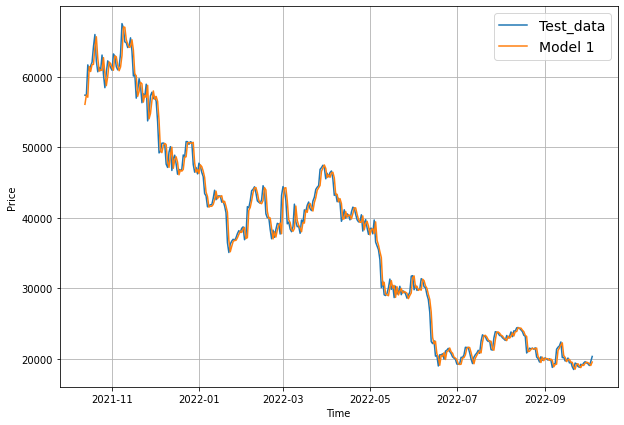

In [116]:
# Plot model_1 forecasts
offset = 300
plt.figure(figsize=(10, 7))

# Index into X_test (dates) to the point where test_windows begins 
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=test_labels[:, 0],
    start=offset,
    format='-',
    label='Test_data'
)
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=model_1_preds,
    start=offset,
    format='-',
    label='Model 1'
)